In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Load the data
df = pd.read_csv("data/file.csv")

# First 5 columns
print(df.head())

# Independent variables
df.drop('Unnamed: 0',axis=1,inplace=True)
X = df.drop('SeriousDlqin2yrs',axis=1)

# Dependent variable
y = df['SeriousDlqin2yrs']

# Check the value counts
y.value_counts()

# Split the data set into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

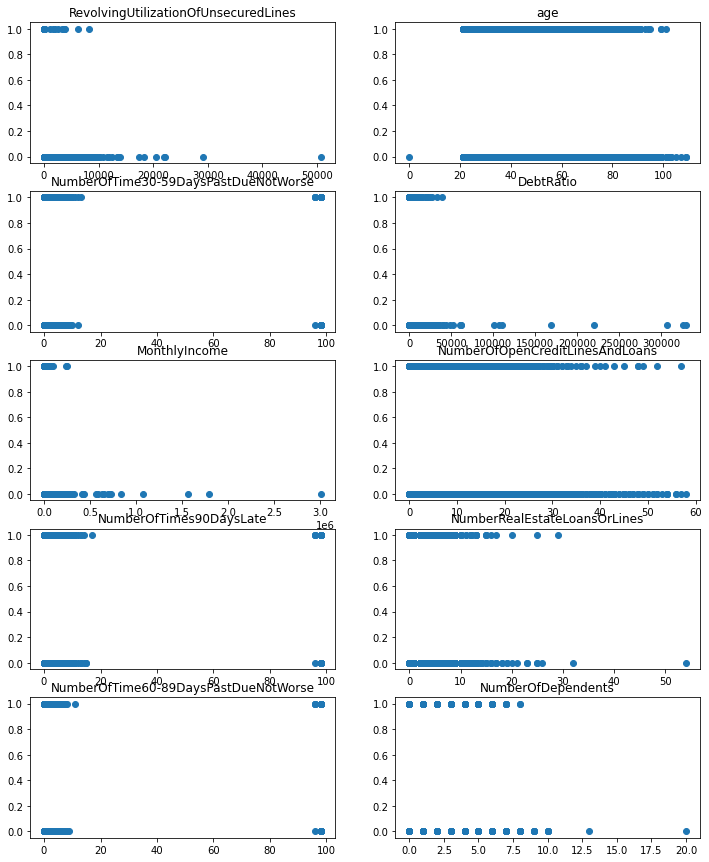

In [30]:
cols = list(X_train.columns)
# create subplots
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(12,15))

# nested for loops to iterate over all the features and plot the same
for i in range(5):
    for j in range(2):
        col = cols[i*2+j]
        axes[i,j].title.set_text(col)
        axes[i,j].scatter(X[col],y)
plt.show()

In [31]:
# Check for null values
print(X_train.isna().sum())

# Filling the missing values for columns in training data set
X_train.fillna(X_train.median(),inplace=True)

# Filling the missing values for columns in testing data set
X_test.fillna(X_train.median(),inplace=True)

# Checking for null values
print(X_train.isna().sum(),'\n',X_test.isna().sum())

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20888
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2736
dtype: int64
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64 
 RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOf

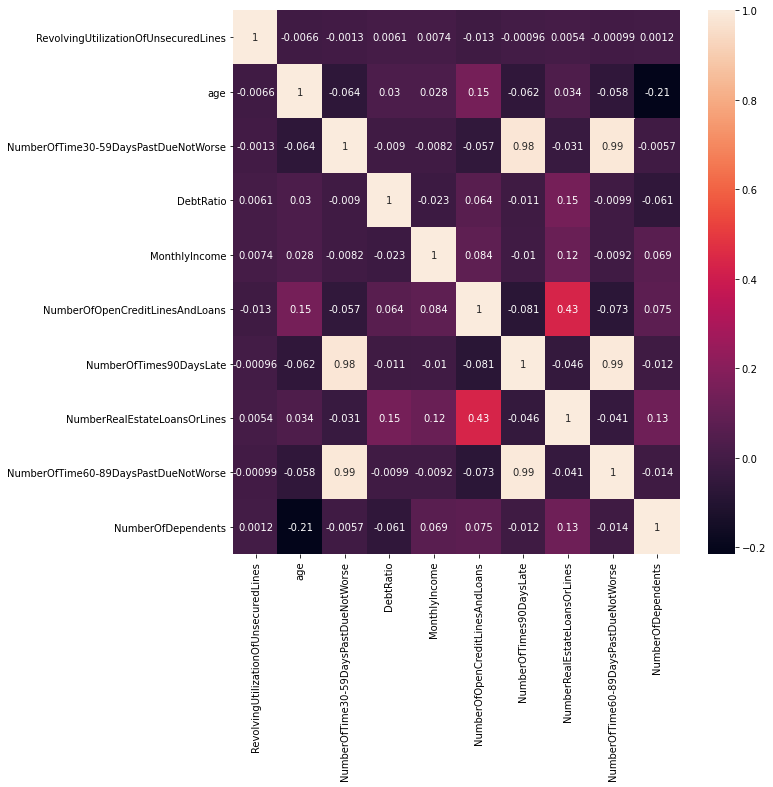

In [32]:
# Correlation matrix for training set
corr = X_train.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# drop the columns which are correlated amongst each other except one
X_train.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],axis=1,inplace=True)
X_test.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Import Logistic regression model and accuracy score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Instantiate the model in a variable in log_reg
log_reg = LogisticRegression()

# Fit the model on training data
log_reg.fit(X_train,y_train)

# Predictions of the training dataset
y_pred = log_reg.predict(X_test)

# accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9328444444444445


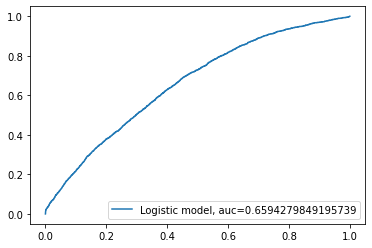

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     41965
           1       0.59      0.01      0.03      3035

    accuracy                           0.93     45000
   macro avg       0.76      0.51      0.50     45000
weighted avg       0.91      0.93      0.90     45000
 [[41935    30]
 [ 2992    43]] F1= 0.02767052767052767


In [35]:
# Import all the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
# Plot the auc-roc curve
score = roc_auc_score(y_test,y_pred)
y_pred_proba = log_reg.predict_proba(X_test)[::1]
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_proba[:,1])
auc = metrics.roc_auc_score(y_test,y_pred_proba[:,1])
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.legend()
plt.show()

# Evaluation parameters for the model
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
rocscore = roc_auc_score(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
classification = classification_report(y_test,y_pred)
print(classification,confusion,"F1=",f1)


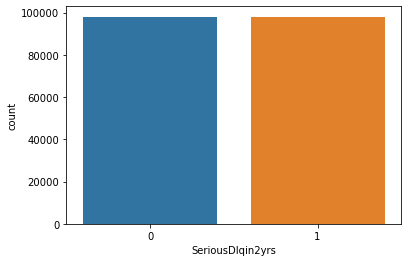

In [36]:
# Import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE

# Check value counts of target variable for data imbalance
y_train.value_counts()

# Instantiate smote
smote = SMOTE(random_state=9)

# Fit Smote on training set
X_sample,y_sample = smote.fit_sample(X_train,y_train)

# Check for count of class
sns.countplot(y_sample)
plt.show()

Confusion_matrix
 [[28393 13572]
 [ 1083  1952]]
Classification_report
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     41965
           1       0.13      0.64      0.21      3035

    accuracy                           0.67     45000
   macro avg       0.54      0.66      0.50     45000
weighted avg       0.91      0.67      0.76     45000

0.2103561614311116


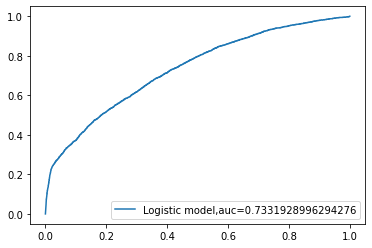

In [37]:
# Fit logistic regresion model on X_sample and y_sample
log_reg.fit(X_sample,y_sample)

# Store the result predicted in y_pred
y_pred = log_reg.predict(X_test)

# Store the auc_roc score
score = metrics.roc_auc_score(y_test,y_pred)

# Store the probablity of any class
y_pred_proba = log_reg.predict_proba(X_test)[:,1]

# Plot the auc_roc_graph
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model,auc="+str(auc))
plt.legend(loc=4)

# Print f1_score,Precision_score,recall_score,roc_auc_score and confusion matrix
f1 = f1_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test))
recall = recall_score(y_test, log_reg.predict(X_test))
roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, log_reg.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))
print(f1)

Confusion_matrix
 [[38827  3138]
 [ 1807  1228]]
Classification_report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     41965
           1       0.28      0.40      0.33      3035

    accuracy                           0.89     45000
   macro avg       0.62      0.66      0.64     45000
weighted avg       0.91      0.89      0.90     45000

F1= 0.3318470476962572


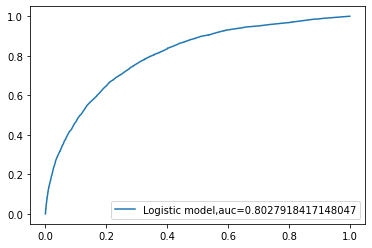

In [38]:
# Import RandomForestClassifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForrestClassifier to a variable rf.
rf = RandomForestClassifier(random_state=9)

# Fit the model on training data.
rf.fit(X_sample,y_sample)

# store the predicted values of testing data in variable y_pred.
y_pred = rf.predict(X_test)

# Store the different evaluation values.
f1 = f1_score(y_test, rf.predict(X_test))
precision = precision_score(y_test, rf.predict(X_test))
recall = recall_score(y_test, rf.predict(X_test))
roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ('Confusion_matrix' + '\n', confusion_matrix(y_test, rf.predict(X_test)))
print ('Classification_report' + '\n' + classification_report(y_test,y_pred))
print("F1=",f1)

# Plot the auc_roc graph
y_pred_proba = rf.predict_proba(X_test)[:,1]

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model,auc="+str(auc))
plt.legend(loc=4)
plt.show()